# Plotting examples
We are going to take some of our clean data from the previous Notebook and visualize it using [seaborn](https://seaborn.pydata.org) library.

In [ ]:
import pandas as pd
import pylab as plt
import os
import seaborn as sns
import re

In [2]:
data_directory = os.path.join("..", "Datasets")

In [3]:
# List all the files available with the 'ls' command
from subprocess import check_output
print(check_output(["ls",data_directory]).decode("utf8"))

CO2Emm_Global_1970-16.csv
EconLossesEU.csv
EU_Country_Losses_16.csv
EU_EngConsPerCap_00-16.csv
EU_GHGemm_Sect_85-16.csv
EU_RenewableEng_Prod_05-16.csv
eurostat_dicts
EU_Total_Losses_80-15.csv
EU_Total_Losses_80-15_pivoted.csv
GlobalTemps.csv
RenewableEnergy_EU_04-16.csv



Lest start with the datafile we cleanned in the previous notebook:

In [14]:
EconLossesEU = pd.read_csv(os.path.join(data_directory, "EU_Total_Losses_80-15.csv"))

In [15]:
EconLossesEU.head()

,Year,Value,variable
0,2016,681.0,clim_losses
1,2016,852.0,per_cap_losses
2,2016,5950.0,water_losses
3,2016,2765.0,met_losses
4,2016,9396.0,total_losses


### Categorical scatterplots

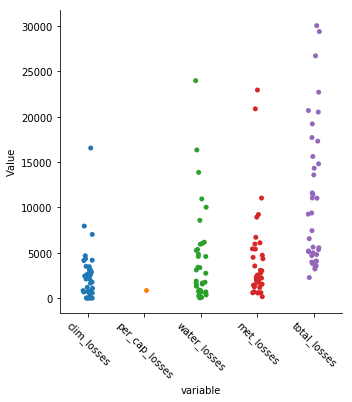

In [6]:
g = sns.catplot(x='variable', 
                   y='Value', 
                   data=EconLossesEU)
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

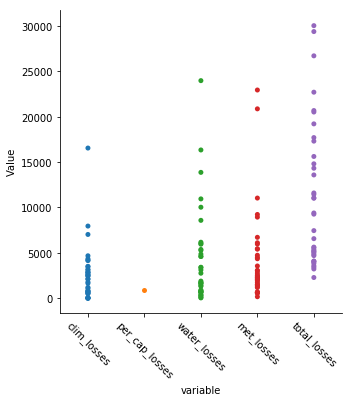

In [33]:

g = sns.catplot(x='variable', 
                   y='Value', 
              
                   data=EconLossesEU, jitter=False) 
g.set_xticklabels(rotation=-45)

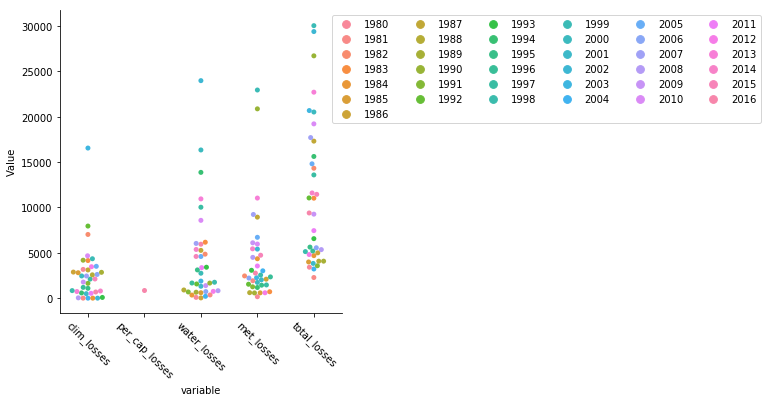

In [50]:
# The hue parameter can add a second variable to the plot
g = sns.catplot(x='variable', 
                   y='Value',   hue='Year',
                   data=EconLossesEU, kind="swarm", legend=False) 
g.set_xticklabels(rotation=-45)
plt.legend(bbox_to_anchor=(2.5, 1), loc='upper right', ncol = 6)

### Boxplots

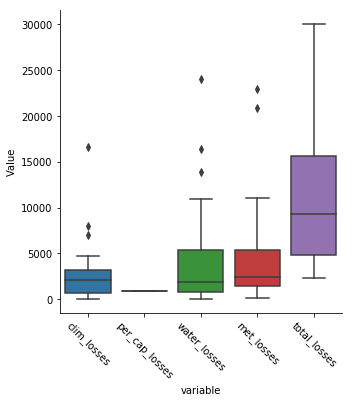

In [12]:
g = sns.catplot(x='variable', 
                   y='Value', 
                   data=EconLossesEU, kind="box") 
g.set_xticklabels(rotation=-45)

In [16]:
### Violin Plots

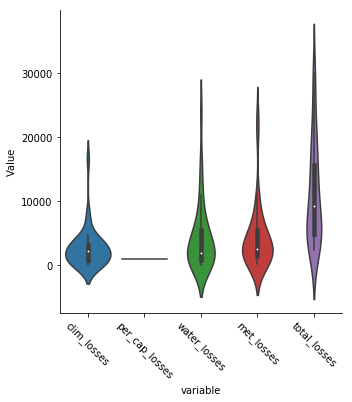

In [13]:
g = sns.catplot(x='variable', 
                   y='Value', 
                   data=EconLossesEU, kind="violin") 
g.set_xticklabels(rotation=-45)

Lets take another dataset from the list.

In [18]:
df = pd.read_csv(os.path.join(data_directory, "CO2Emm_Global_1970-16.csv"))

In [19]:
df.head()

,ISO_CODE,ISO_NAME,Year,GHG per capita emissions,CO2/cap
0,AFG,Afghanistan,1970,1.557705,0.156962
1,ALB,Albania,1970,3.355742,2.062545
2,DZA,Algeria,1970,4.645362,1.207575
3,AGO,Angola,1970,6.772412,1.191541
4,AIA,Anguilla,1970,0.776791,0.338751


### Scatterplot

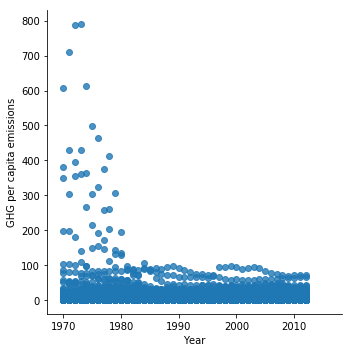

In [20]:
sns.lmplot('Year', 'GHG per capita emissions', data=df, fit_reg=False)

### Joint Distribution Plot

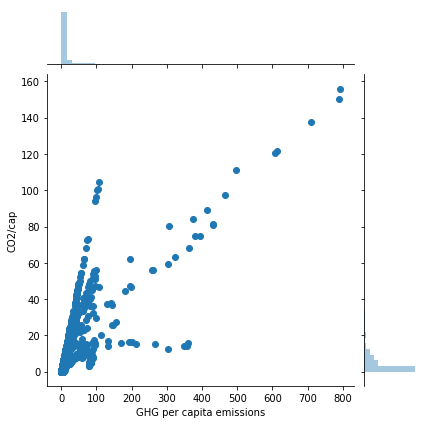

In [21]:
sns.jointplot(x='GHG per capita emissions', y='CO2/cap', data=df)

We can also plot a linear regression with the marginal distributions and apply some style to the plots.

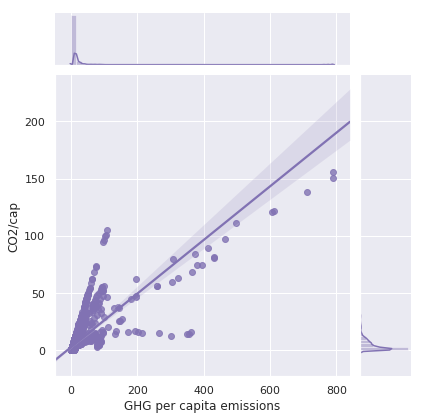

In [61]:
sns.set(style="darkgrid")
sns.jointplot(x='GHG per capita emissions', y='CO2/cap', kind='reg', color="m", data=df)

### Barplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

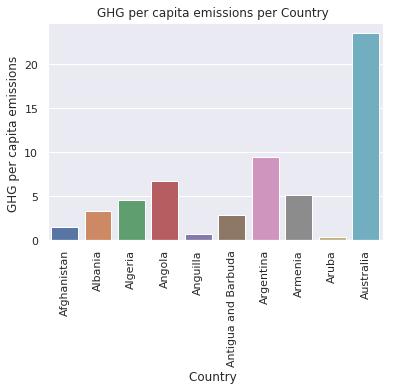

In [62]:
sns.barplot(data = df.head(10),x = 'ISO_NAME',y = 'GHG per capita emissions')
plt.ylabel('GHG per capita emissions ', fontsize=12)
plt.xlabel('Country ', fontsize=12)
plt.title('GHG per capita emissions per Country ')
plt.xticks(rotation='vertical')

Text(0.5,1,'GHG per capita emissions per Country ')

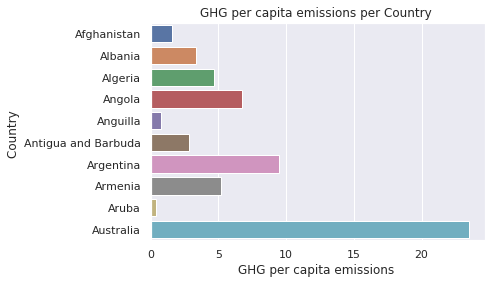

In [63]:
sns.barplot(data = df.head(10),y = 'ISO_NAME',x = 'GHG per capita emissions')
plt.xlabel('GHG per capita emissions ', fontsize=12)
plt.ylabel('Country ', fontsize=12)
plt.title('GHG per capita emissions per Country ')


### Density Plot

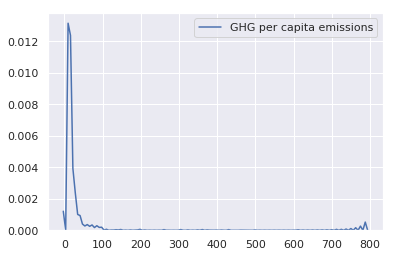

In [64]:
sns.kdeplot(df['GHG per capita emissions'])

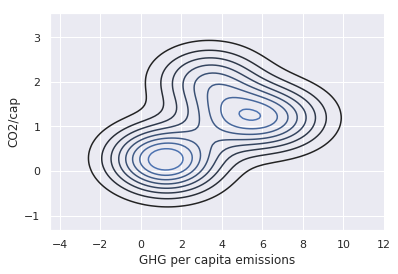

In [65]:
sns.kdeplot(df.head()['GHG per capita emissions'], df.head()['CO2/cap'])

### Heatmap plot
Heatmaps help you visualize matrix-like data.

Finally lets load the pivoted example from the last notebook to calculate and visialize the correlation matrix.

In [67]:
EconLossesEUpiv = pd.read_csv(os.path.join(data_directory, "EU_Total_Losses_80-15_pivoted.csv"))
EconLossesEUpiv.head()

,Year,clim_losses,met_losses,total_losses,water_losses
0,1980,3170.0,158.0,3414.0,86.0
1,1981,2.0,1919.0,2277.0,356.0
2,1982,7026.0,2452.0,14331.0,4853.0
3,1983,4149.0,708.0,11026.0,6169.0
4,1984,2.0,4346.0,4690.0,342.0


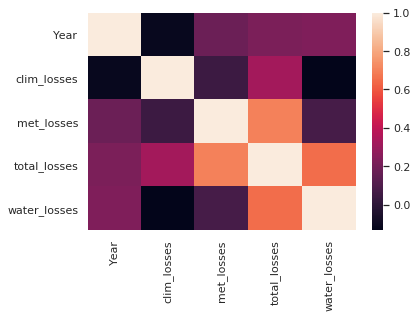

In [68]:
# Calculate correlations
corr = EconLossesEUpiv.corr()
 
# Heatmap
sns.heatmap(corr)